# Machine Learning At Scale

Data Analytics and Machine Learning at Scale 

---
__Name:__  *Dr. James G. Shanahan*   
__Email:__  *James.Shanahan  @ gmail.com   
__Quiz:__  WordCount with sort twists 

# Please first choose which Spark cluster backs this notebook to get your SC/sqlContext

* Back this notebook by Spark that is running on your local machine in a Container world
* Back this notebook by Spark that is running an EMR Cluster (note one has to read and write data from/to S3 to run Spark jobs on EMR)
* Back this notebook by Spark that is rnning on your local machine natively

### Run the next cell if you wish to launch a Spark cluster on your local machine in a Container world and back this notebook by that cluster

In [1]:
import os
import sys 
import pyspark
from pyspark.sql import SQLContext

# We can give a name to our app (to find it in Spark WebUI) and configure execution mode
# In this case, it is local multicore execution with "local[*]"
app_name = "WordCount"
master = "local[*]"
conf = pyspark.SparkConf().setAppName(app_name).setMaster(master)
sc = pyspark.SparkContext(conf=conf)
sqlContext = SQLContext(sc)
print sc
print sqlContext

### Run the next cell if you wish to back this notebook by an EMR cluster that is already up and running

In [ ]:
import os
import sys 
# First, we initialize the Spark environment
import findspark
findspark.init('/usr/lib/spark')

import pyspark
from pyspark.sql import SQLContext

# We can give a name to our app (to find it in Spark WebUI) and configure execution mode
# In this case, it is local multicore execution with "local[*]"
app_name = "example-logs"
master = "local[*]"
conf = pyspark.SparkConf().setAppName(app_name).setMaster(master)
sc = pyspark.SparkContext(conf=conf)
sqlContext = SQLContext(sc)
print(sc)
print(sqlContext)

### Run the next cell if you wish to launch a Spark cluster on your local machine in NATIVE model and back this notebook by that cluster

In [1]:
import os
import sys #current as of 9/26/2015

# spark_home = os.environ['SPARK_HOME'] = '/Users/jshanahan/Dropbox/Lectures-UC-Berkeley-ML-Class-2015/spark-1.6.1-bin-hadoop2.6/'
spark_home = os.environ['SPARK_HOME'] = '/Users/jshanahan/Dropbox/Lectures-UC-Berkeley-ML-Class-2015/spark-1.6.1-bin-hadoop2.6/'
if not spark_home:
    raise ValueError('SPARK_HOME enviroment variable is not set')
sys.path.insert(0,os.path.join(spark_home,'python'))
sys.path.insert(0,os.path.join(spark_home,'python/lib/py4j-0.9-src.zip'))

# First, we initialize the Spark environment

import findspark
#findspark.init()

import pyspark
from pyspark.sql import SQLContext

# We can give a name to our app (to find it in Spark WebUI) and configure execution mode
# In this case, it is local multicore execution with "local[*]"
app_name = "example-logs"
master = "local[*]"
conf = pyspark.SparkConf().setAppName(app_name).setMaster(master)
sc = pyspark.SparkContext(conf=conf)
sqlContext = SQLContext(sc)


print(sc)
print(sqlContext)


# Import some libraries to work with dates
import dateutil.parser
import dateutil.relativedelta as dateutil_rd

# Beginning of Quiz

### Save data to disk [NOTE: one has to save to S3 on EMR]

In [40]:
%%writefile wordcount.txt
hello hi hi hallo
bonjour hola hi ciao
nihao konnichiwa ola
hola nihao hello

Overwriting wordcount.txt


In [4]:
cat wordcount.txt

hello hi hi hallo
bonjour hola hi ciao
nihao konnichiwa ola
hola nihao hello

## NOTES on Inputs to Spark

http://spark.apache.org/docs/latest/programming-guide.html
All of Spark’s file-based input methods, including textFile, support running on directories, compressed files, and wildcards as well. For example, you can use textFile("/my/directory"), textFile("/my/directory/*.txt"), and textFile("/my/directory/*.gz").

The textFile method also takes an optional second argument for controlling the number of partitions of the file. By default, Spark creates one partition for each block of the file (blocks being 64MB by default in HDFS), but you can also ask for a higher number of partitions by passing a larger value. Note that you cannot have fewer partitions than blocks.

In [41]:
rdd = sc.parallelize('wordcount.txt')  #distributes the string
rdd.first()
# returns 'w'   Why? This code distributes the string and not the file.
#rdd.count() 

'w'

In [42]:
rdd = sc.textFile('wordcount.txt')  #create an RDD
rdd.count()

4

In [43]:
rdd.first()

u'hello hi hi hallo'

In [5]:
#Count words in file/directory
logFileNAME = 'wordcount.txt'
text_file = sc.textFile(logFileNAME)
counts = text_file.flatMap(lambda line: line.split(" ")) \
             .map(lambda word: (word, 1)) \
             .reduceByKey(lambda a, b: a + b)
wordCounts = counts.collect()
for v in counts.collect():
    print v

(u'ciao', 1)
(u'bonjour', 1)
(u'nihao', 2)
(u'hola', 2)
(u'konnichiwa', 1)
(u'hallo', 1)
(u'hi', 3)
(u'hello', 2)
(u'ola', 1)


In [6]:
print wordCounts

[(u'ciao', 1), (u'bonjour', 1), (u'nihao', 2), (u'hola', 2), (u'konnichiwa', 1), (u'hallo', 1), (u'hi', 3), (u'hello', 2), (u'ola', 1)]


# General purpose Plotting function for BarPlots

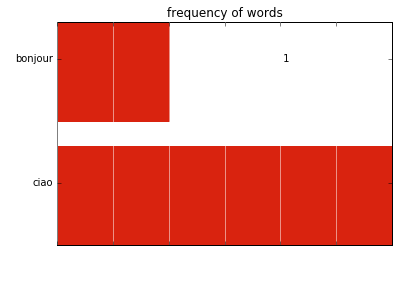

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

# this is general purpose code to produce a barplot from a list like
# See Unit test below for an example use case

def myBarPlot(dimensionMeasureList, measureStr):
    """
    Show a bar chart of the total measure per item
    """
    items = [d[0] for d in dimensionMeasureList]
    minutes  = [d[1] for d in dimensionMeasureList]
    index    = list(xrange(len(items)))

    fig, axe = plt.subplots()
    bars = axe.barh(index, minutes)

    # Add the total measure (e.g., wordcount) to the right
    for idx, air, min in zip(index, items, minutes):
        if min > 0:
            bars[idx].set_color('#d9230f')
            axe.annotate(" %0.0f" % min, xy=(min+1, idx+0.5), va='center')
        else:
            bars[idx].set_color('#469408')
            axe.annotate(" %0.0f" % min, xy=(10, idx+0.5), va='center')

    # Set the ticks
    ticks = plt.yticks([idx+ 0.5 for idx in index], items)
    xt = plt.xticks()[0]
    plt.xticks(xt, [' '] * len(xt))

    #minimize chartjunk
    plt.grid(axis = 'x', color ='white', linestyle='-')

    plt.title(measureStr)
    plt.show()


#  Unit test for myBarPlot
myBarPlot([(u'hallo', 5), (u'konnichiwa', 4), (u'ola', 3), (u'ciao', 3), (u'bonjour', 1)][3:] , 
          "frequency of words")

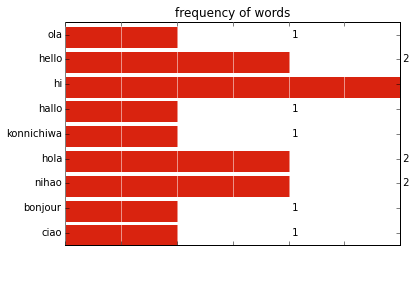

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

# this is general purpose code to produce a barplot from a list like
# wordCounts = [(u'hallo', 1),
#  (u'konnichiwa', 1),
#  (u'ola', 1),
#  (u'ciao', 1),
#  (u'bonjour', 1),
#  (u'nihao', 2),
#  (u'hello', 2),
#  (u'hola', 2),
#  (u'hi', 3)]
#  to Call use 
#   plot(wordCounts[:10], "frequency of words")

def plot(delays, measureStr):
    """
    Show a bar chart of the total delay per airline
    """
    airlines = [d[0] for d in delays]
    measures  = [d[1] for d in delays]
    index    = list(xrange(len(airlines)))

    fig, axe = plt.subplots()
    bars = axe.barh(index, measures)

    # Add the total minutes to the right
    for idx, air, min in zip(index, airlines, measures):
        if min > 0:
            bars[idx].set_color('#d9230f')
            axe.annotate(" %0.0f" % min, xy=(min+1, idx+0.5), va='center')
        else:
            bars[idx].set_color('#469408')
            axe.annotate(" %0.0f" % min, xy=(10, idx+0.5), va='center')

    # Set the ticks
    ticks = plt.yticks([idx+ 0.5 for idx in index], airlines)
    xt = plt.xticks()[0]
    plt.xticks(xt, [' '] * len(xt))

    #minimize chartjunk
    plt.grid(axis = 'x', color ='white', linestyle='-')

    plt.title(measureStr)
    plt.show()


#  E.g., Call
plot(wordCounts[:10], "frequency of words")

__sortByKey([ascending], [numTasks])__	

When called on a dataset of (K, V) pairs where K implements Ordered, returns a dataset of (K, V) pairs sorted by keys in ascending or descending order, as specified in the boolean ascending argument.

In [15]:
wordCounts

[(u'ciao', 1),
 (u'bonjour', 1),
 (u'nihao', 2),
 (u'hola', 2),
 (u'konnichiwa', 1),
 (u'hallo', 1),
 (u'hi', 3),
 (u'hello', 2),
 (u'ola', 1)]

In [34]:
#Last 1
wordCounts[8:]

[(u'hi', 3)]

In [36]:
#first  5
wordCounts[:5]

[(u'hallo', 1), (u'konnichiwa', 1), (u'ola', 1), (u'ciao', 1), (u'bonjour', 1)]

# Quiz: Part 1: Modify the code to sort the word count records in decreasing order of frequency and plot

### your code should procuce something like this
>[(u'hi', 3)
(u'nihao', 2)
(u'hello', 2)
(u'hola', 2)
(u'hallo', 1)
(u'konnichiwa', 1)
(u'ola', 1)
(u'ciao', 1)
(u'bonjour', 1)]

(u'hi', 3)
(u'nihao', 2)
(u'hello', 2)
(u'hola', 2)
(u'hallo', 1)
(u'konnichiwa', 1)
(u'ola', 1)
(u'ciao', 1)
(u'bonjour', 1)


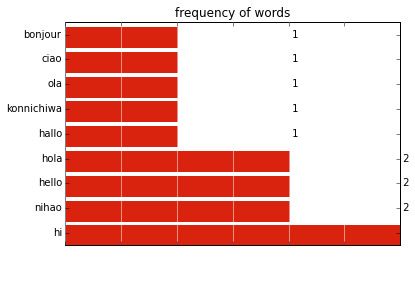

In [29]:
#modify the code to sort the word count records in decreasing order of frequency and plot

text_file = sc.textFile(logFileNAME)
counts = text_file.flatMap(lambda line: line.split(" ")) \
    .map(lambda word: (word, 1)) \
    .reduceByKey(lambda a, b: a + b, 1) \
     
wordCounts = counts.collect()
for v in counts.collect():
    print v
    
myBarPlot(wordCounts[:10], "frequency of words")



# Quiz: Part 2 Modify the code to produce a list of the 5 rarest words

(u'hallo', 1)
(u'konnichiwa', 1)
(u'ola', 1)
(u'ciao', 1)
(u'bonjour', 1)


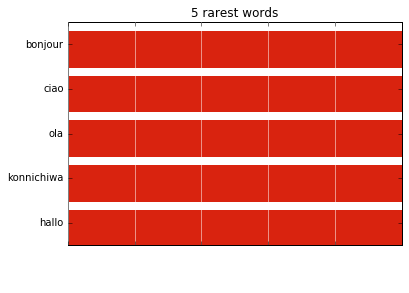

In [16]:
#  sort increasing L
logFileNAME = 'wordcount.txt'
text_file = sc.textFile(logFileNAME)
counts = text_file.flatMap(lambda line: line.split(" ")) \
    .map(lambda word: (word, 1)) \
    .reduceByKey(lambda a, b: a + b, 1) \
    .map(lambda (a, b): (b, a)) \

    
myBarPlot(wordCounts, "5 rarest words")

In [5]:
#Doodle
logFileNAME = 'wordcount.txt'
text_file = sc.textFile(logFileNAME)

text_file.partitions()

AttributeError: 'RDD' object has no attribute 'partitions'